In [24]:

import numpy as np
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
import math

Chapter - 3:
1.Adding Layers
2.Example of adding layers
3.Create a dense layer by book
4.Creative experiments


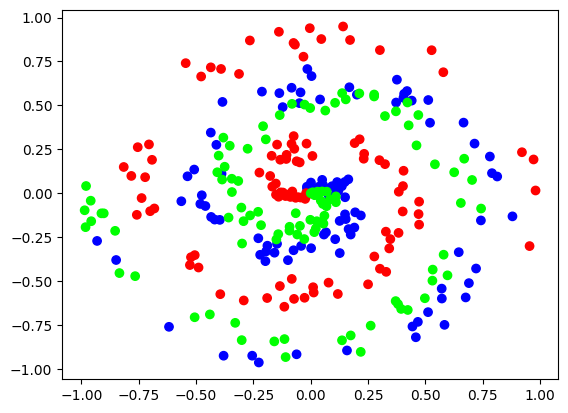

Random initialization : 
[[ 0.3343881   0.11022578  0.42121637 -0.24615626  1.4615599 ]
 [-0.70348966  0.26754004 -0.8453279  -1.3140771   0.13917153]]
Zero of 2 X 5 : M
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
weights : 
 [[-0.000873    0.01491376 -0.00702421  0.01676638]
 [ 0.00976558 -0.00596189 -0.0183255   0.0035866 ]] 
Shape : 
biases : 
 [[0. 0. 0. 0.]]
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.1108559e-04  2.5209672e-05 -2.5258230e-06]
 [-2.2922808e-04  6.1331542e-05 -2.0557520e-06]
 [-1.3622960e-04 -9.1931426e-05 -4.4743039e-05]
 [ 3.7576305e-04 -2.9435928e-04 -6.2335959e-05]]


In [25]:
X,y = spiral_data(samples = 100,classes = 3)
plt.scatter(X[:, 0 ], X[:, 1 ], c = y, cmap = 'brg' )
plt.show()

print("Random initialization : ")
print (np.random.randn( 2 , 5 ))
print("Zero of 2 X 5 : M")
print (np.zeros(( 2 , 5 )))

#initializing number of input layers as n_inputs
n_inputs = 2
#initializing number of neurons as n_neurons
n_neurons = 4

weights = 0.01 * np.random.randn(n_inputs, n_neurons)
biases = np.zeros(( 1 , n_neurons))

print ('weights : \n',weights,'\nShape : ',)
print ('biases : \n',biases)

#adding a class : 
class Layer_Dense :
    def __init__ ( self , n_inputs , n_neurons ):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros(( 1 , n_neurons))
    def forward ( self , inputs ):
        self.output = np.dot(inputs, self.weights) + self.biases

X, y = spiral_data( samples = 100 , classes = 3 )

dense1 = Layer_Dense( 2 , 3 )

dense1.forward(X)

print (dense1.output[: 5 ])

Chapter 4 : 
1. Relu activation function
2. Softmax activation function
3.Implementation

In [26]:
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = []

"""
#Just basic for loop we really dont have to use this
for i in inputs:
    if i > 0 :
        output.append(i)
    else :
        output.append( 0 )"""



"""
#Then comes way number 2
for i in inputs:
    output.append( max ( 0 , i))"""

#This is how we get things done by numpy
"""output = np.maximum( 0 , inputs)
print (output,'\n')
"""
#Relu activated
class Activation_ReLU :
    def forward ( self , inputs ):
        self.output = np.maximum( 0 , inputs)


X, y = spiral_data( samples = 100 , classes = 3 )

#declaring objects
dense1 = Layer_Dense( 2 , 3 )
activation1 = Activation_ReLU()
dense1.forward(X)
activation1.forward(dense1.output)

# Let's see output of the first few samples:
print (activation1.output[: 5 ],'\n')

#softmax thingy
layer_outputs = [ 4.8 , 1.21 , 2.385 ]

"""exp_values = []

E = 2.71828182846

#Exponentiating the outputs
for output in layer_outputs:
    exp_values.append(E ** output) # ** - power operator in Python

print ('exponentiated values:' )
print (exp_values,'\n')

# Now normalize values
norm_base = sum (exp_values) # We sum all values
norm_values = []

for value in exp_values:
    norm_values.append(value / norm_base)

print ( 'Normalized exponentiated values:' )
print (norm_values,'\n')

print ( 'Sum of normalized values:' , sum (norm_values))

"""

"""
#doning things with numpy
exp_values = np.exp(inputs)
probabilities = exp_values/np.sum(exp_values,axis = 1,keepdims=True)
"""


layer_outputs = np.array([[ 4.8 , 1.21 , 2.385 ],
                        [ 8.9 , - 1.81 , 0.2 ],
                        [ 1.41 , 1.051 , 0.026 ]])

"""print ( 'Sum without axis' )
print (np.sum(layer_outputs),'\n')

print ( 'This will be identical to the above since default is None:' )
print (np.sum(layer_outputs, axis = None ),'\n')

print ( 'Another way to think of it w/ a matrix == axis 0: columns:' )
print (np.sum(layer_outputs, axis = 0 ),'\n')

print ( 'But we want to sum the rows instead, like this w/ raw py:' )
for i in layer_outputs:
    print ( sum (i))

print('\n')
print ( 'So we can sum axis 1, but note the current shape:' )
print (np.sum(layer_outputs, axis = 1 ),'\n')

print ( 'Sum axis 1, but keep the same dimensions as input:' )
print (np.sum(layer_outputs, axis = 1 , keepdims = True ),'\n')"""

class Activation_Softmax :
    def forward ( self , inputs ):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1 ,
        keepdims = True ))
        probabilities = exp_values / np.sum(exp_values, axis = 1,keepdims = True )
        self.output = probabilities

softmax = Activation_Softmax()
softmax.forward([[1,2,3]])
print(softmax.output,'\n')

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print("New Softmax activation output : ")
print(activation2.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.1559131e-05 0.0000000e+00]
 [0.0000000e+00 1.7273115e-04 0.0000000e+00]
 [6.9941481e-05 0.0000000e+00 3.8983781e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]] 

[[0.09003057 0.24472847 0.66524096]] 

New Softmax activation output : 
[[0.33333334 0.33333334 0.33333334]
 [0.33333376 0.333333   0.3333333 ]
 [0.3333348  0.33333224 0.33333296]
 [0.33333343 0.33333302 0.3333336 ]
 [0.3333341  0.33333248 0.33333346]]


Chapter 5 : Calculating loss

In [27]:
softmax_outputs = np.array([[ 0.7 , 0.1 , 0.2 ],
                            [ 0.1 , 0.5 , 0.4 ],
                            [ 0.02 , 0.9 , 0.08 ]])

class_targets = [0,1,1]

for targ_idx,distribution in zip(class_targets,softmax_outputs):
    print(distribution[targ_idx])

#In this code the outputs are retrieved according to the indexes of the classes
# row1 = 0: 0.7
# row2 = 1: 0.5
# row3 = 0: 0.9

0.7
0.5
0.9


In [28]:
print(softmax_outputs[[0,1,2],class_targets])


[0.7 0.5 0.9]


In [29]:
print(softmax_outputs[
    range(len(softmax_outputs)),class_targets
])

[0.7 0.5 0.9]


In [30]:
neg_log = - np.log(softmax_outputs[
range ( len (softmax_outputs)), class_targets
])
average_loss = np.mean(neg_log)
print (average_loss)

0.38506088005216804


In [31]:
softmax_outputs = np.array([[ 0.7 , 0.1 , 0.2 ],
[ 0.1 , 0.5 , 0.4 ],
[ 0.02 , 0.9 , 0.08 ]])
class_targets = np.array([[ 1 , 0 , 0 ],
[ 0 , 1 , 0 ],
[ 0 , 1 , 0 ]])
# Probabilities for target values -
# only if categorical labels
if len (class_targets.shape) == 1 :
    correct_confidences = softmax_outputs[
    range ( len (softmax_outputs)),
    class_targets
    ]

elif len (class_targets.shape) == 2 :
    correct_confidences = np.sum(
    softmax_outputs * class_targets,
    axis = 1
    )
# Losses
neg_log = - np.log(correct_confidences)
average_loss = np.mean(neg_log)
print (average_loss)

0.38506088005216804


In [32]:
class Loss :

    def calculate ( self , output , y ):
# Calculate sample losses
        sample_losses = self.forward(output, y)
# Calculate mean loss
        data_loss = np.mean(sample_losses)
# Return loss
        return data_loss

class Loss_CategoricalCrossentropy ( Loss ):
# Forward pass
    def forward ( self , y_pred , y_true ):
        samples = len (y_pred)


        y_pred_clipped = np.clip(y_pred, 1e-7 , 1 - 1e-7 )

        if len (y_true.shape) == 1 :
            correct_confidences = y_pred_clipped[
            range (samples),
            y_true
            ]
        elif len (y_true.shape) == 2 :
            correct_confidences = np.sum(
            y_pred_clipped * y_true,
            axis = 1
            )
# Losses
        negative_log_likelihoods = - np.log(correct_confidences)
        return negative_log_likelihoods
    
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print (loss)

0.38506088005216804


The full Code (Will be updated )

In [33]:
class Layer_Dense :
# Layer initialization
    def __init__ ( self , n_inputs , n_neurons ):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros(( 1 , n_neurons))

    def forward ( self , inputs ):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU :
    def forward ( self , inputs ):
        self.output = np.maximum( 0 , inputs)

# Softmax activation
class Activation_Softmax :
    def forward ( self , inputs ):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1 , keepdims = True ))

        probabilities = exp_values / np.sum(exp_values, axis = 1 ,keepdims = True )
        self.output = probabilities

class Loss :
    def calculate ( self , output , y ):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy ( Loss ):
    def forward ( self , y_pred , y_true ):
        samples = len (y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7 , 1 - 1e-7 )

        if len (y_true.shape) == 1 :
            correct_confidences = y_pred_clipped[
            range (samples),
            y_true
            ]
        elif len (y_true.shape) == 2 :
            correct_confidences = np.sum(
            y_pred_clipped * y_true,
            axis = 1
            )
        negative_log_likelihoods = - np.log(correct_confidences)
        return negative_log_likelihoods
    
    # Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )

dense1 = Layer_Dense( 2 , 3 )

X, y = spiral_data( samples = 100 , classes = 3 )

dense1 = Layer_Dense( 2 , 3 )
activation1 = Activation_ReLU()
dense2 = Layer_Dense( 3 , 3 )
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print (activation2.output[: 5 ])
loss = loss_function.calculate(activation2.output, y)
print ( 'loss:' , loss)
activation1 = Activation_ReLU()
dense2 = Layer_Dense( 3 , 3 )
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)
print (activation2.output[: 5 ])
loss = loss_function.calculate(activation2.output, y)
print ( 'loss:' , loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33333337 0.33333325 0.33333337]
 [0.33333337 0.33333322 0.3333334 ]
 [0.33333337 0.3333332  0.33333346]
 [0.33333337 0.3333331  0.33333352]]
loss: 1.0986228
[[0.33333334 0.33333334 0.33333334]
 [0.33333322 0.33333328 0.3333335 ]
 [0.33333316 0.33333325 0.33333358]
 [0.3333331  0.3333332  0.33333367]
 [0.333333   0.33333313 0.33333388]]
loss: 1.0986156


Chapter : 5 - Optimization

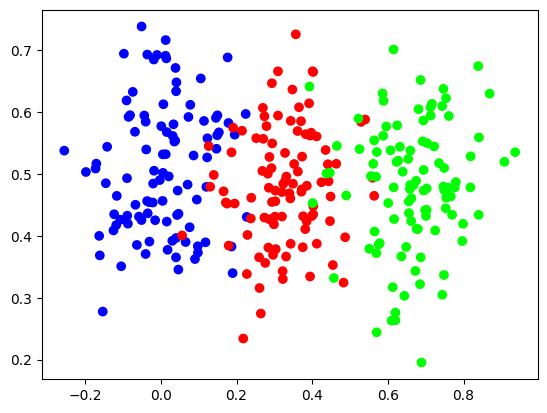

In [34]:
#plotting another dataset
from nnfs.datasets import vertical_data

nnfs.init()

X,y = vertical_data(samples=100,classes = 3)

plt.scatter(X[:,0],X[:,1],c=y,cmap = 'brg')
plt.show()

In [35]:
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 999999
final_loss = lowest_loss
final_accuracy = 100000
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases += 0.05 * np.random.randn(1,3)
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases += 0.05 * np.random.randn(1,3)

    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output,y)

    predictions = np.argmax(activation2.output,axis = 1)
    accuracy = np.mean(predictions==y)

    if (loss < lowest_loss):
        #print('New set of weights found , iteration',iteration, 'loss' , loss , 'acc', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
        final_loss = loss
        final_accuracy = accuracy
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

print('Final loss :', final_loss)
print('Final accuracy :',final_accuracy)

Final loss : 0.17278232
Final accuracy : 0.9333333333333333


Chapter 7: Optimization
1.Derivatives


In [36]:

def f(x):
    return 2*x**2

p2_delta = 0.0000001
x1 = 1
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

approximate_derivative = (y2-y1)/(x2-x1)
print(approximate_derivative)   

4.000000199840144


(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785 


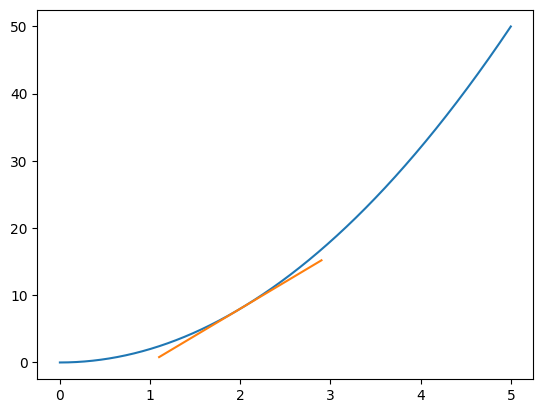

In [37]:
def f ( x ):
    return 2 * x ** 2
# np.arange(start, stop, step) to give us smoother line
x = np.arange( 0 , 5 , 0.001 )
y = f(x)
plt.plot(x, y)

# The point and the "close enough" point
p2_delta = 0.0001
x1 = 2
x2 = x1 + p2_delta
y1 = f(x1)
y2 = f(x2)
print ((x1, y1), (x2, y2))

approximate_derivative = (y2 - y1) / (x2 - x1)
b = y2 - approximate_derivative * x2
# We put the tangent line calculation into a function so we can call
# it multiple times for different values of x
# approximate_derivative and b are constant for given function
# thus calculated once above this function
def tangent_line ( x ):
    return approximate_derivative * x + b

to_plot = [x1 - 0.9 , x1, x1 + 0.9 ]
plt.plot(to_plot, [tangent_line(i) for i in to_plot])
print ( 'Approximate derivative for f(x)' ,f'where x = {x1} is {approximate_derivative} ' )
plt.show()


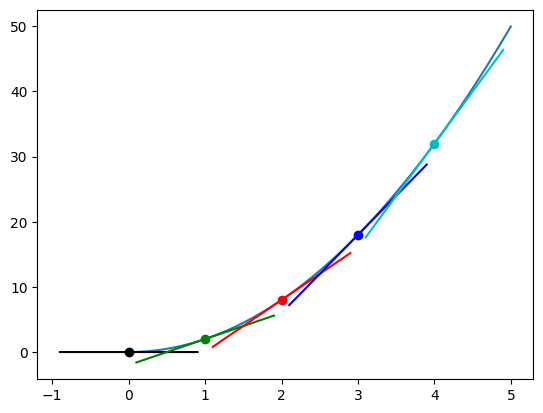

In [38]:
def f(x):
    return 2*x**2

x = np.array(np.arange(0,5,0.001))
y = f(x)
plt.plot(x,y)

colors = ['k','g','r','b','c']

def approximate_tangent_line(x, approximate_derivative,):
    return (approximate_derivative * x) + b

for i in range(5):
    p2_delta = 0.0001
    x1 = i
    x2 = x1 + p2_delta

    y1 = f(x1)
    y2 = f(x2)

    approximate_derivative = (y2 - y1)/(x2 - x1)
    b = y2 - (approximate_derivative * x2)

    to_plot = [x1-0.9,x1,x1+0.9]

    plt.scatter(x1,y1,c=colors[i])

    plt.plot([point for point in to_plot],
             [approximate_tangent_line(point,approximate_derivative)for point in to_plot],
              c=colors[i])
plt.show()


Chapter 9:Backprop


In [39]:
x = [1.0,-2.0,3.0]
w = [-3.0,-1.0,2.0]
b = 1.0

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
z = xw0 + xw1 + xw2 + b

y = max(z,0)
dvalue = 1.0

drelu_dz = dvalue * (1. if z > 0 else 0.)

print(drelu_dz)


dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]

dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]

dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1


drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db

print (drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

drelu_dx0 = drelu_dz * dsum_dxw0 * dmul_dx0 
drelu_dx1 = drelu_dz * dsum_dxw1 * dmul_dx1
drelu_dx2 = drelu_dz * dsum_dxw2 * dmul_dx2
drelu_dw0 = drelu_dz * dsum_dxw0 * dmul_dw0
drelu_dw1 = drelu_dz * dsum_dxw1 * dmul_dw1
drelu_dw2 = drelu_dz * dsum_dxw2 * dmul_dw2

print (drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)

1.0
1.0 1.0 1.0 1.0
-3.0 1.0 -1.0 -2.0 2.0 3.0


In [40]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs
dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights
db = drelu_db # gradient on bias...just 1 bias here.

print (w, b)

w[ 0 ] += - 0.001 * dw[ 0 ]
w[ 1 ] += - 0.001 * dw[ 1 ]
w[ 2 ] += - 0.001 * dw[ 2 ]
b += - 0.001 * db
print (w, b)

[-3.0, -1.0, 2.0] 1.0
[-3.001, -0.998, 1.997] 0.999


In [41]:
xw0 = x[ 0 ] * w[ 0 ]
xw1 = x[ 1 ] * w[ 1 ]
xw2 = x[ 2 ] * w[ 2 ]

z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max (z, 0 )
print (y)

5.985


In [42]:
dvalues = np.array([[ 1. , 1. , 1. ],
[ 2. , 2. , 2. ],
[ 3. , 3. , 3. ]])

weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5,-0.91,0.26,-0.5],
                    [-0.26,-0.27,0.17,0.87]]).T

inputs = np.array([[1,2,3,2.5],
                   [2,5,-1,2],
                   [-1.5,2.7,3.3,-0.8]])

biases = np.array([[2,3,0.5]])

layer_outputs = np.dot(inputs,weights) + biases
relu_outputs = np.maximum(0,layer_outputs)

drelu = relu_outputs.copy()


In [43]:
dvalues = np.array([[1.,1.,1.],
                    [2.,2.,2.],
                    [3.,3.,3.]])

inputs = np.array([
    [1,2,3,2.5],
    [2.,5.,-1.,2],
    [-1.5,2.7,3.3,-0.8]
])

weights = np.array([
    [0.2,0.8,-0.5,1],
    [0.5,-0.91,0.26,-0.5],
    [-0.26,-0.27,0.17,0.87]
]).T

biases = np.array([[2,3,0.5]])

layer_outputs = np.dot(inputs,weights) + biases
relu_outputs = np.maximum(0,layer_outputs)

drelu = relu_outputs.copy()
drelu[layer_outputs <= 0] = 0

dinputs = np.dot(drelu,weights.T)
dweights = np.dot(inputs.T,drelu)
dbiases = np.sum(drelu,axis = 0,keepdims = True)

weights += -0.001 * dweights
biases += -0.001 * dbiases

print(weights)
print(biases)

[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]


In [44]:
w = np.array([
    [0.2,0.8,-0.5,1],
    [0.5,-0.91,0.26,-0.5],
    [-0.26,-0.27,0.17,0.87]
])
x = np.array([[1,2,3,2.5],
             [2,5,-1,2],
             [-1.5,2.7,3.3,-0.8]]).T

b = np.array([[2,3,0.5]]).T

forward = np.dot(w,x) + b
forward

array([[ 4.79999995,  8.9000001 ,  1.41000003],
       [ 1.21000004, -1.80999994,  1.051     ],
       [ 2.38499999,  0.19999999,  0.02599999]])

In [ ]:
class Layer_Dense:
    def __init__(self,inputs,neurons):
        self.weights = 0.01 * np.random.randn(inputs,neurons)
        self.biases = np.zeros((1,neurons))
        self.dinputs = np.dot(dvalues, self.weights.T)

    def forward(self,inputs):
        self.output = np.dot(inputs,self.weights) + self.biases

class Activation_ReLU:
    def forward(self,inputs):
        self.inputs = inputs
        self.output = np.maximum(0,inputs)
    def backward(self,dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0


class Loss_CategoricalCrossentropy(loss)
    def backward(self,dvalues,y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels[y_true])

        self.dinputs = -y_true/dvalues
        self.dinputs = self.dinputs/dvalues
